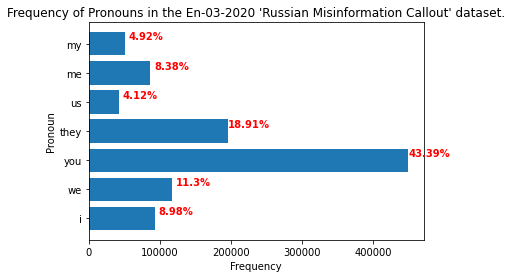

In [10]:
import re
import pandas as pd
import feather
import matplotlib.pyplot as plt

# adjustable file in ftr format
save_dir = "./allEnglishTweets.ftr"

# reads contents of save_dir.ftr
read_ftr = pd.read_feather(save_dir, columns=None, use_threads=True);

# adjustable vocabulary list.
# only works if the words do not contain whitespace.
vocab = ["i", "we", "you", "they", "us", "me", "my"]

# series to list adapter
# Places all tweet text in a list, seperated by word.
s = (" ".join(read_ftr["text"]).split())

# creates a dictionary object where k=vocab[x] and v=counter
wordcount = dict((x,0) for x in vocab)

# for each w in text, if w is in the dictionary object, increase the respective counter.
for i in s:
    for w in re.findall(r"\w+", i):
        if w in wordcount:
            wordcount[w] += 1
            
def percentage(part, whole):
  return round(100 * float(part)/float(whole), 2)

# prints results to console.
total = []
total_num = 0
for i in wordcount:
    total_num+=wordcount[i]
    total.append(wordcount[i])

ax = plt.barh(range(len(wordcount)), list(wordcount.values()), align='center')
plt.yticks(range(len(wordcount)), list(wordcount.keys()))
plt.title("Frequency of Pronouns in the En-03-2020 'Russian Misinformation Callout' dataset.",fontsize= 12)
plt.xlabel('Frequency')
plt.ylabel('Pronoun')

for i, v in enumerate(total):
    plt.text(v+30000, i+.25, str(percentage(total[i], total_num)) + "%", color='red', fontweight='bold', verticalalignment='center', horizontalalignment='center')

plt.savefig('en-03-2020-freq-of-pronouns-with-me-v2.png')

Breakdown of above English count:
<br /> You &rightarrow; *448,859*
<br /> They &rightarrow; *195,629*
<br /> We &rightarrow; *116,930*
<br /> I &rightarrow; *92,845*
<br /> Me &rightarrow; *86,630*
<br /> Us &rightarrow; *42,634*

